# Scikit-learn

[Scikit-learn](http://scikit-learn.org/stable/) is the popular library for performing machine learning. Sklearn is used by many companies, including Evernote, Spotify, DataRobot...

Scikit-learn contains the most important algorithms for supervised learning, unsupervised learning, dataprocessing...

## 1. Simple linear regression

Linear regression is probably the most simple machine learning model. The Sklearn implementation is not so comprehensive (for statistical analysis) as its mate in R, but we can use it to nicely illustrate how a model is generally implemented in Sklearn.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

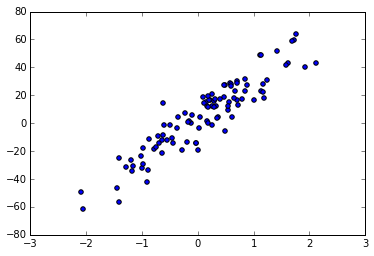

In [2]:
# make a random regression example
X, y = make_regression(n_features=1, n_samples=100, noise=10)

plt.scatter(X, y)

Most models are implemented as a class. This means that you first have to construct an object which has associated functions to train, predict, transform the data...

In [3]:
linear_regressor = LinearRegression(fit_intercept=True, normalize=False)  # define an instance
linear_regressor.fit(X, y)  # fit on the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
print("Slope is %.2f"%linear_regressor.coef_)
print("Intercept is %.2f"%linear_regressor.intercept_)

Slope is 27.10
Intercept is 2.62


In [5]:
linear_regressor.predict(3)

array([ 83.92709811])

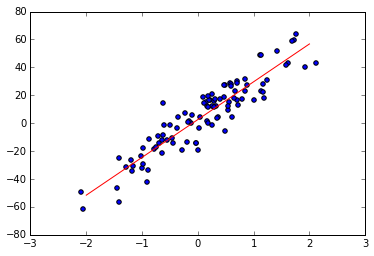

In [6]:
x_new = np.linspace(-2, 2).reshape((-1, 1))
pred_new = linear_regressor.predict(x_new)

fig, ax = plt.subplots()

ax.scatter(X,y)
ax.plot(x_new, pred_new, "r-")

## 2. Classification

A more complex example: three-class classification, where we want to estimate our performance on new data.

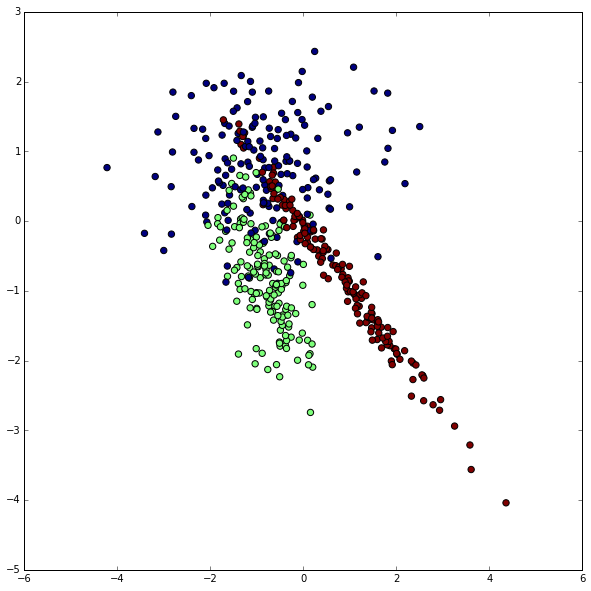

In [7]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3, n_clusters_per_class=1, n_samples=500, shuffle=True, n_features=2, class_sep=0.8, n_redundant=0)

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(X[:,0], X[:,1], c=y, s=40)

In [8]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

# we will fit on the first 400 instances and test on the last 100 instances

classifier.fit(X[:400], y[:400])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [9]:
from sklearn.metrics import classification_report

y_predicted = classifier.predict(X[400:])

print(classification_report(y_predicted, y[400:]))

             precision    recall  f1-score   support

          0       0.71      0.76      0.73        29
          1       0.87      0.85      0.86        39
          2       0.94      0.91      0.92        32

avg / total       0.84      0.84      0.84       100



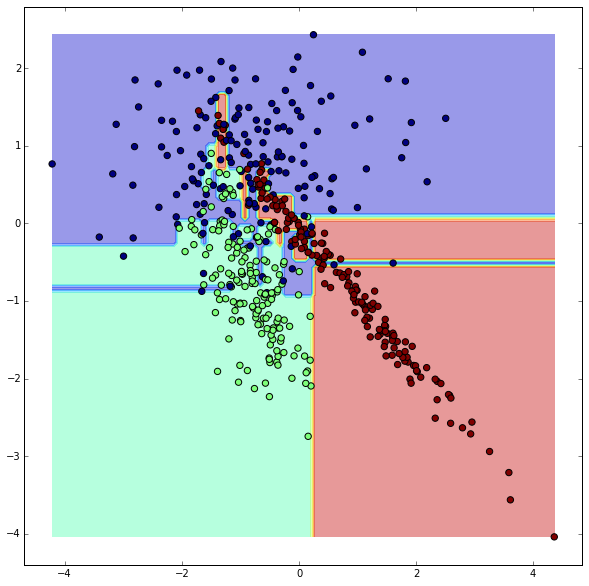

In [10]:
xx1, xx2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), np.linspace(X[:,1].min(), X[:,1].max(), 100))
Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx1, xx2, Z, alpha=0.4)
ax.scatter(X[:,0], X[:,1], c=y, s=40)

## 3. Pipelines and cross validation, hyperparameter selection...

An important part of getting a good model is preprocessing: feature standardization, extracting features from images, dimension reduction... Using a pipeline we can chain different processes / models.

For example, if we want to perform scaling before classification:

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
classifier = DecisionTreeClassifier()

scaling_classifier = Pipeline([("normalize", normalizer), ("classify", classifier)])

In [12]:
scaling_classifier.fit(X, y)

Pipeline(steps=[('normalize', Normalizer(copy=True, norm='l2')), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'))])

In [13]:
scaling_classifier.predict(X)

array([1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0,
       2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1,

Let's consider a more challenging example. We have 11000 articles about 20 differnt topics. We will build a model to label each document with a suitable topic based on the text. Our model will contain the following parts:

- [Count vectorizer](https://en.wikipedia.org/wiki/Vector_space_model): converts a collection of text documents to a matrix of token counts
- [Tfid](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) transformation: transforms the count vectors in Term Frequency Inverse Document Frequency representation
- SDGClassifier: a linear classifier leaned by [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

In [14]:
from sklearn.datasets import fetch_20newsgroups
newsgroup_train = fetch_20newsgroups(subset="train")
newsgroup_test = fetch_20newsgroups(subset="test")

In [15]:
for label in newsgroup_train.target_names:
    print(label)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [16]:
print(newsgroup_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier

count_vectorizer = CountVectorizer()
tfid = TfidfTransformer()
classifier = SGDClassifier(alpha=0.1, loss="hinge")

text_classifier = Pipeline([("vect", count_vectorizer), ("tfid", tfid), ("clf", classifier)])

In [18]:
text_classifier.fit(newsgroup_train.data, newsgroup_train.target)

Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))])

In [19]:
prediced_labels = text_classifier.predict(newsgroup_test.data)
print(classification_report(newsgroup_test.target, prediced_labels))

             precision    recall  f1-score   support

          0       0.81      0.24      0.38       319
          1       0.14      0.94      0.25       389
          2       0.81      0.25      0.39       394
          3       0.79      0.21      0.33       392
          4       0.95      0.10      0.18       385
          5       0.95      0.09      0.16       395
          6       0.95      0.09      0.17       390
          7       0.94      0.39      0.55       396
          8       0.95      0.56      0.71       398
          9       0.18      0.95      0.30       397
         10       0.94      0.51      0.66       399
         11       0.77      0.78      0.78       396
         12       0.86      0.05      0.09       393
         13       0.95      0.15      0.26       396
         14       0.85      0.70      0.77       394
         15       0.53      0.64      0.58       398
         16       0.75      0.41      0.53       364
         17       0.67      0.51      0.58   

In the classifier, we chose the hyperparameter $\alpha$ and the loss function quite arbitrary. We can use cross-validation to find the optimal value!

In [ ]:
from sklearn.grid_search import GridSearchCV

# define grid for parameters to search
parameters = {"clf__alpha": [1e-6, 1e-4, 0.001, 0.01], "clf__loss" : ["hinge", "log"]}

grid_search = GridSearchCV(text_classifier, parameters, n_jobs=-1, cv=4, verbose=True)  # use fourfold CV to obtain best model

In [ ]:
grid_search.fit(newsgroup_train.data, newsgroup_train.target)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [ ]:
grid_search.best_params_

In [ ]:
prediced_labels = grid_search.predict(newsgroup_test.data)
print(classification_report(newsgroup_test.target, prediced_labels))

## 4. Synthesis (for fun) 

Compare different algorithms for classiciation. Example borrowed from [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [ ]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ("%.2f" % score).lstrip("0"),
                size=15, horizontalalignment="right")
        i += 1

figure.subplots_adjust(left=.02, right=.98)

## 4. Irises: on your own!

In the folder data there is a dataset `iris.csv` containing the length and with of the sepals and petals of 150 instances of three species of irises. You have to build and test a model to classify irises to a certain species using the flower morphology:

- load the data using Pandas
- visualize the data
- randomly divide the data in train and test set (100 irises for train, 50 for test)
- choose one of the following classifiers: LDA, QDA, randomforest, nearest neighbours or support vector classifier (whatever you like most)
- make a confusion matrix on your test set

**The species labels in the dataset are given by a name, not a number! Use a label encoder to deal with this!**

In [ ]:
# for randomly choosing a subset
from random import shuffle
indices = range(150)
shuffle(indices)
train_indices = indices[:100]
test_indices = indices[100:]

# for dealing with the labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# classifiers
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC